In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

In [ ]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

y_train = np.asarray(y_train).astype('float32')
y_test = np.asarray(y_test).astype('float32')

max_length = 100

x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4)

In [ ]:
n_latent_factors = 25

model = models.Sequential()
model.add(layers.Embedding(vocab_size+1, n_latent_factorplot_model(model)s, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 25)           250025    
                                                                 
 flatten (Flatten)           (None, 2500)              0         
                                                                 
 dense (Dense)               (None, 16)                40016     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 290,330
Trainable params: 290,330
Non-trainable params: 0
_________________________________________________________________


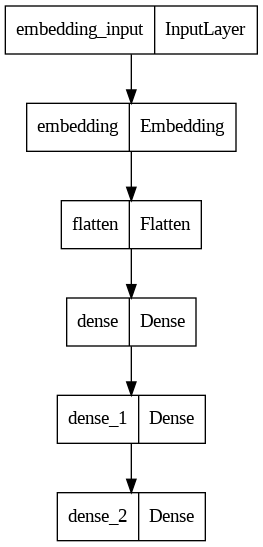

In [ ]:
plot_model(model)

In [ ]:

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 15ms/step - loss: 0.6924 - binary_accuracy: 0.5167 - val_loss: 0.6917 - val_binary_accuracy: 0.5373
Epoch 2/20
30/30 [==============================] - 0s 11ms/step - loss: 0.6865 - binary_accuracy: 0.6081 - val_loss: 0.6824 - val_binary_accuracy: 0.6223
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.6496 - binary_accuracy: 0.7055 - val_loss: 0.6203 - val_binary_accuracy: 0.6838
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.5225 - binary_accuracy: 0.7982 - val_loss: 0.4857 - val_binary_accuracy: 0.7812
Epoch 5/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3902 - binary_accuracy: 0.8486 - val_loss: 0.4070 - val_binary_accuracy: 0.8151
Epoch 6/20
30/30 [==============================] - 0s 11ms/step - loss: 0.3027 - binary_accuracy: 0.8853 - val_loss: 0.3843 - val_binary_accuracy: 0.8221
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - los

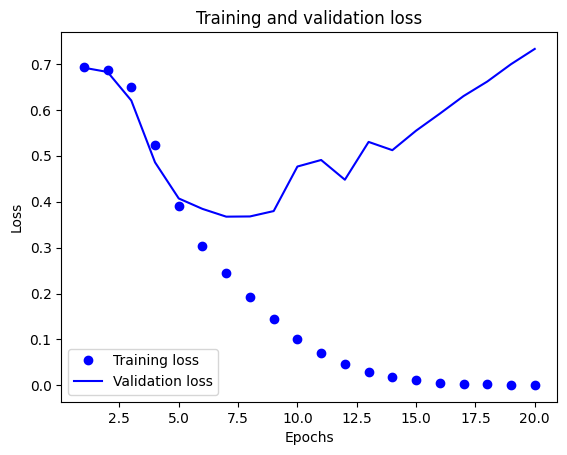

In [ ]:


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

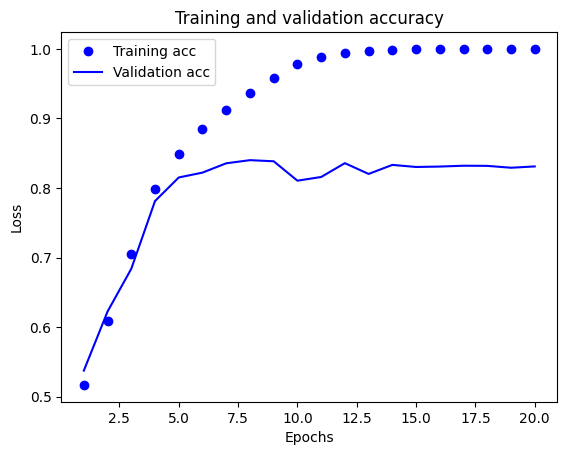

In [ ]:


plt.clf()   # clear figure
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()